In [ ]:
!pip install tensorflow==2.2.1

In [1]:
import tensorflow as tf


In [2]:
print(tf.__version__)

2.9.2


In [3]:
#! pip install tensorflow-gpu==2.2.0
# restart the runtime 

# importing  all the Packages

In [4]:
# import Libaries and packages 
import matplotlib as plt
import matplotlib.pyplot as plt 
%matplotlib inline 

import numpy as np
import pandas as pd
import random 
import pickle
import cv2
import os
import time
import warnings
from tqdm import tqdm_notebook as tqdm 
import itertools 

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report 


from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense , Dropout 
from tensorflow.keras.optimizers import SGD 

# Loading your data from disk for training

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
pd.set_option("display.max_columns",None)

In [7]:
df=pd.read_csv("/content/drive/MyDrive/ANN/credit card fraud Detection/creditcard .csv")

# Data exploration  

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,1.874948e-12,1.053347e-12,7.127611e-13,-1.474791e-13,-5.231558e-13,-2.282250e-13,-6.425436e-13,4.950748e-13,7.057397e-13,1.766111e-12,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')

# let check the duplicate value

In [12]:
# finding duplicates rows
duplicates=df.duplicated()

# filter the DataFrame to selected only the duplicate row 
duplicate_values =  df[duplicates]

# print the duplicates values 
duplicate_values 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,-1.192581,0.944989,1.372532,-0.036493,-0.208747,0.320086,-0.204910,-0.024821,-0.468859,0.031950,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [13]:
duplicate_values.shape

(1081, 31)

In [14]:
# drop duplicate rows()
df = df.drop_duplicates()

In [15]:
df.shape

(283726, 31)

In [16]:
df["class"].value_counts()

0    283253
1       473
Name: class, dtype: int64

In [17]:
import seaborn as sns

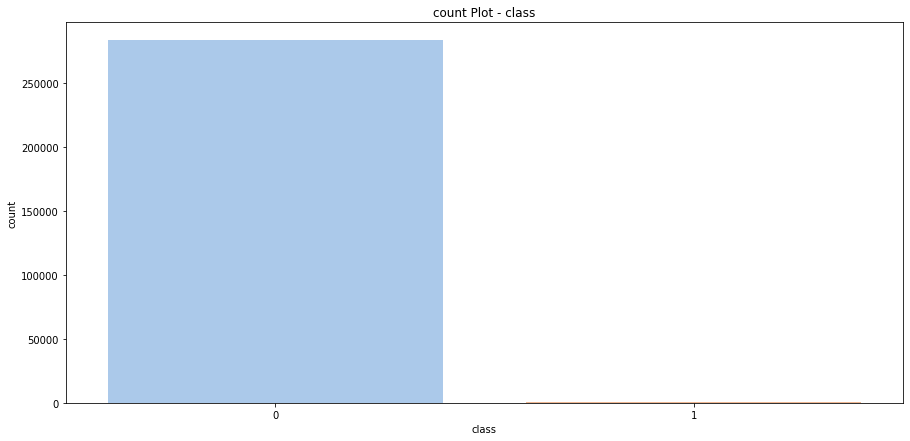

In [18]:
plt.figure(figsize=[15,7])
plt.title("count Plot - class")
sns.countplot(x="class",data = df,palette = "pastel")

In [19]:
import plotly.express as px
from plotly.subplots  import make_subplots
import plotly.graph_objects as go
import plotly

In [20]:
lis=["Not Fraud", "Frauds"]
no_fraud = df["class"].value_counts().tolist()
values = [no_fraud[0],no_fraud[1]]
fig = px.pie(values=df["class"].value_counts(),names=lis, width=800, height = 400 , color_discrete_sequence=["skyblue","red"],
             title="percentage between Frauds and genuine transactions")

fig.show()

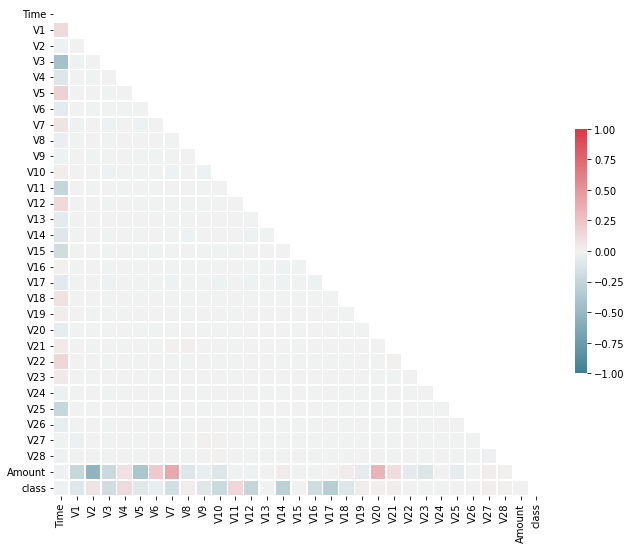

In [21]:
corr = df.corr()
mask = np.zeros_like(corr, dtype = np.bool) #  it returns  an  array of a given shape with type as an array with zeros 
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(11,9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)
# Draw  the heatmap with the mask and correct aspect  ratio 
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,vmin=-1,center=0,linewidth=.5,cbar_kws={"shrink": .5})




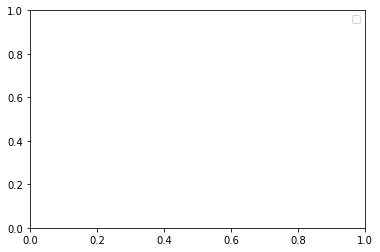

In [22]:
plt.figure(figsize=(6,4))
sns.kdeplot(df= df[df["class"]==0]["V17"],label="Normal",shade=True)
sns.kdeplot(df = df[df["class"]==1]["V17"],label="Normal",shade = True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df= df[df["class"]==0]["V10"],label="Normal",shade=True)
sns.kdeplot(df = df[df["class"]==1]["V10"],label="Normal",shade = True)
plt.legend()
plt.show()

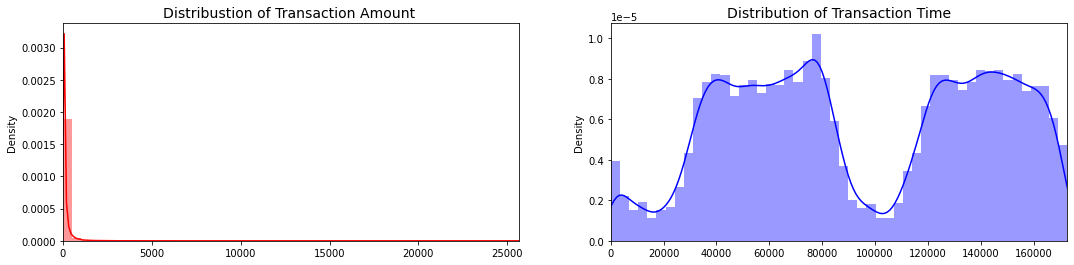

In [23]:
fig, ax =  plt.subplots(1, 2, figsize = (18, 4))

val_Amount = df["Amount"].values
Val_Time = df["Time"].values

sns.distplot(val_Amount, ax=ax[0], color = "r")
ax[0].set_title("Distribustion of Transaction Amount ", fontsize = 14)
ax[0].set_xlim([min(val_Amount),max(val_Amount)])

sns.distplot(Val_Time, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(Val_Time), max(Val_Time)])

plt.show()

In [24]:
fraud=df[df["class"]==1]
genuine = df[df["class"]==0]

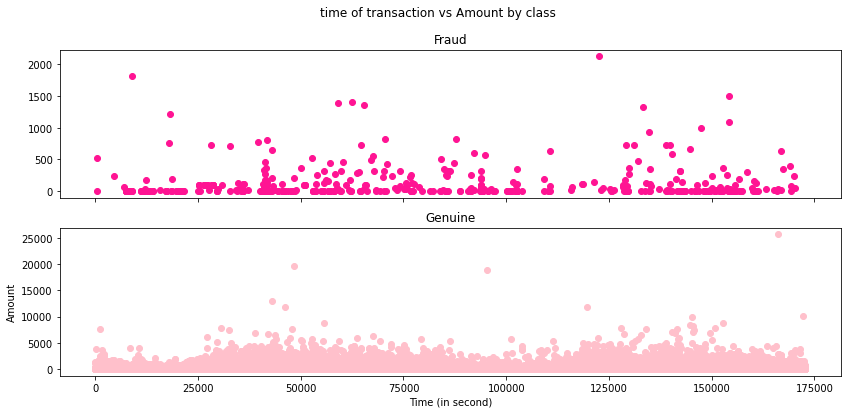

In [25]:
from pylab import rcParams
rcParams["figure.figsize"]=14,6
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle("time of transaction vs Amount by class")
ax1.scatter(fraud.Time, fraud.Amount,color = "deeppink")
ax1.set_title("Fraud")
ax2.scatter(genuine.Time, genuine.Amount, color = "pink")
ax2.set_title("Genuine")
plt.xlabel("Time (in second)")
plt.ylabel("Amount")
plt.show()

# Bivarite Analysis

Text(0.5, 1.0, 'Transaction Times for genuine users ')

<Figure size 576x288 with 0 Axes>

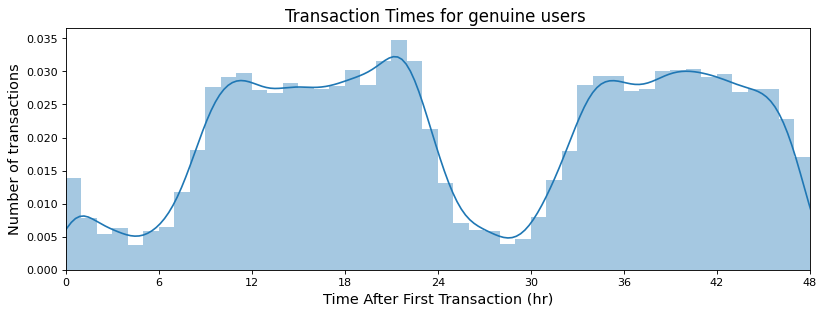

In [26]:
# Bivarite Analysis 
plt.figure(figsize=(8,4))
Nofraud_data = df[df['class']==0]
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(Nofraud_data ['Time']/3600, bins=48)
plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel('Time After First Transaction (hr)',fontsize=13)
plt.ylabel('Number of transactions',fontsize=13)
plt.title('Transaction Times for genuine users ',fontsize=15)

Text(0.5, 1.0, 'Transaction Times for genuine users ')

<Figure size 576x288 with 0 Axes>

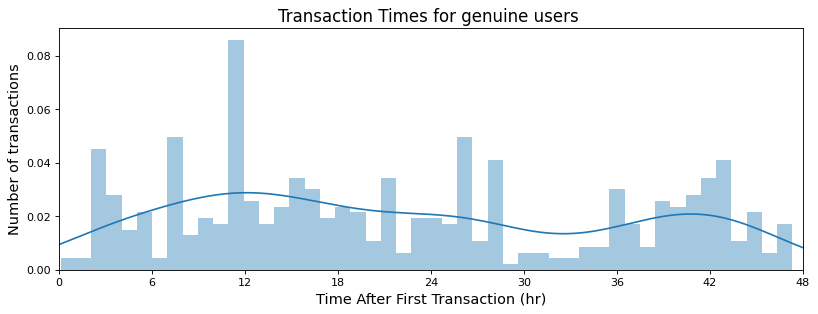

In [27]:
# Bivarite Analysis 
plt.figure(figsize=(8,4))
Nofraud_data = df[df['class']==1]
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(Nofraud_data ['Time']/3600, bins=48)
plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel('Time After First Transaction (hr)',fontsize=13)
plt.ylabel('Number of transactions',fontsize=13)
plt.title('Transaction Times for genuine users ',fontsize=15)

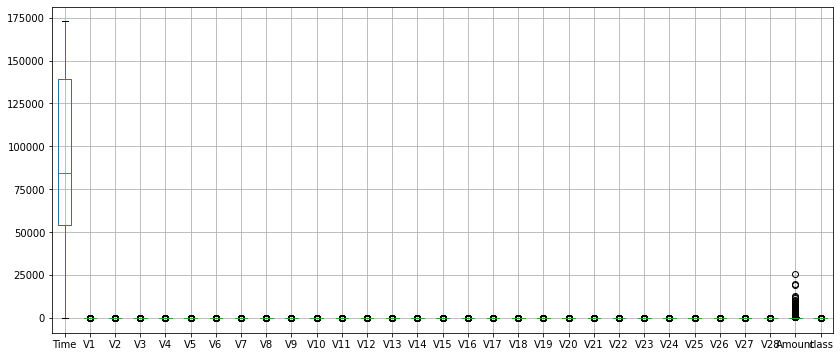

In [28]:
df.boxplot()

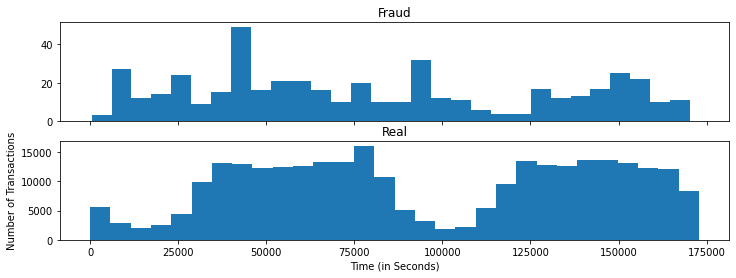

In [30]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Time[df["class"] == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df["class"] == 0], bins = bins)
ax2.set_title('Real')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

The 'Time' feature looks pretty similar across both types of transactions. You could argue that fraudulent transactions are more uniformly distributed, while normal transactions have a cyclical distribution. This could make it easier to detect a fraudulent transaction during at an 'off-peak' time.

In [31]:
import matplotlib.gridspec as gridspec

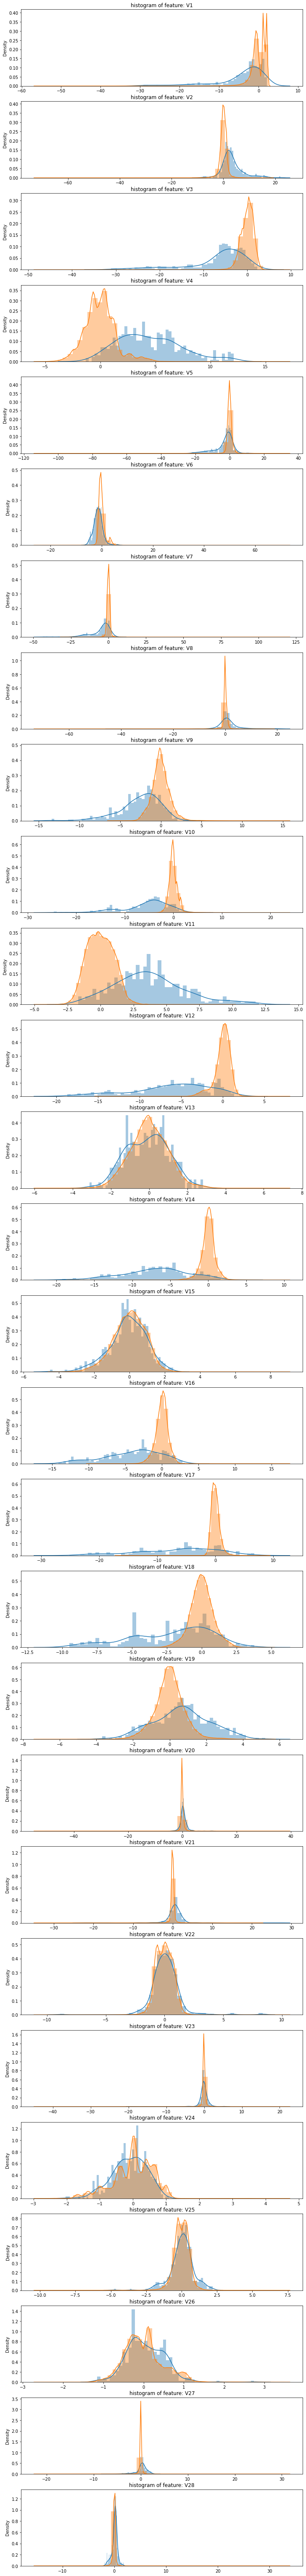

In [35]:
features = df.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28,1)

for i, cn in enumerate(df[features]):
  ax=plt.subplot(gs[i])
  sns.distplot(df[cn][df["class"]==1],bins=50)
  sns.distplot(df[cn][df["class"] == 0],bins=50)
  ax.set_xlabel("")
  ax.set_title("histogram of feature: " + str (cn))
plt.show()

# Pre-Processing 

Normalize the amount variable so that  it can be on the same scale as other variables are 

In [36]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

df["Amount_normalize"] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))

In [37]:
df["Amount_normalize"].head()

0    0.244200
1   -0.342584
2    1.158900
3    0.139886
4   -0.073813
Name: Amount_normalize, dtype: float64

In [38]:
df = df.drop(["Amount"],axis=1)
df = df.drop(["Time"], axis=1)

In [39]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,class,Amount_normalize
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


In [40]:
X= df.drop("class",axis=1)
Y=df["class"]

In [41]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X, Y, test_size=0.3, random_state=0)


In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(198608, 29)
(85118, 29)
(198608,)
(85118,)


### converting the labels from integers / categories to vector 

In [44]:
#y_train = to_categorical(y_train,num_classes=2)
#y_test = to_categorical(y_test,num_classes=2)

In [45]:
#y_train

# Deep Neural network 

In [47]:
model=Sequential([
    Dense(units=16, input_dim = 29,activation='relu', kernel_initializer = "uniform"),
    Dense(units=24,activation='relu',kernel_initializer="uniform"),
    #Dropout(0.5),
   # Dense(units=20,activation='relu',kernel_initializer = "uniform"),
   # Dense(units=20,activation='relu',kernel_initializer="uniform"),
    Dense(1,activation='sigmoid',kernel_initializer="uniform")
])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                480       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________


# Complining  The Model 

In [49]:
# initializer our initial learning rate and # of epochs to train for 
#INIT_LR = 0.01
#EPOCHS = 50

# complie the model using SGD  as aur optimizer and categorical cross - entropy loss 
# (you'll want to use binary_crossentropy for 1-class classification )

print("[INFO] compiling network network......")
#opt = SGD(lr = INIT_LR) # Stochastic Gradient Descent (SGD)  optimizer

model.compile(optimizer="adam",loss="binary_crossentropy",metrics = ["accuracy"])

[INFO] compiling network network......


# Training your model on your traing data

In [50]:
import time

In [51]:
# train  the neural network on trainging data set 
#batch_size(15) control the size of each group of data to pass through the network 

time1=time.time()  # to measure time taken
history = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=5,batch_size=15)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken



Epoch 1/5
13241/13241 [==============================] - 49s 3ms/step - loss: 0.0089 - accuracy: 0.9989 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 2/5
13241/13241 [==============================] - 47s 4ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 3/5
13241/13241 [==============================] - 47s 4ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 4/5
13241/13241 [==============================] - 46s 4ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 5/5
13241/13241 [==============================] - 45s 3ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9994
Time taken: 262.6 seconds


In [52]:
score = model.evaluate(x_test,y_test)

2660/2660 [==============================] - 6s 2ms/step - loss: 0.0031 - accuracy: 0.9994


In [53]:
print(score)

[0.003067369805648923, 0.9994008541107178]


In [54]:
# Evaluating  your model on Your Test data 
print("[INFO] evaluting networks.....")
y_pred = model.predict(x_test)

[INFO] evaluting networks.....
2660/2660 [==============================] - 4s 1ms/step


In [55]:
y_pred

array([[1.5206130e-05],
       [7.0987403e-06],
       [1.5464084e-05],
       ...,
       [7.4301684e-06],
       [4.1153093e-05],
       [2.7692195e-05]], dtype=float32)

In [56]:
y_test=pd.DataFrame(y_test)

In [57]:
conf_matrix = confusion_matrix(y_test, y_pred.round())

In [58]:
conf_matrix

array([[84970,    19],
       [   32,    97]])

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools


def plot_confusion_metrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """this function prints and plot the confusion matirx
    Normalization can be applied by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion Matrix, Without Normalisation
[[84970    19]
 [   32    97]]


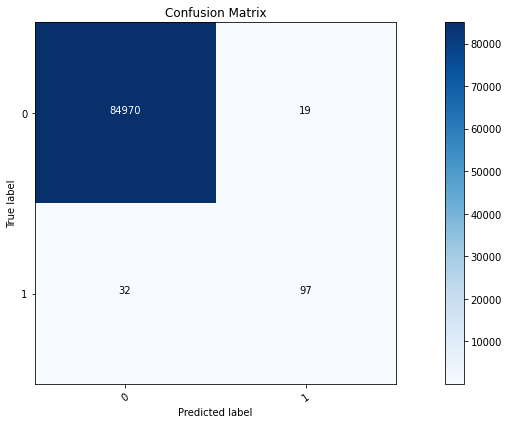

In [60]:
plot_confusion_metrix(conf_matrix,classes=[0,1])

# Let's plot same confusion matrix for entire data set

In [61]:
y_pred1 = model.predict(X)
y_expected = pd.DataFrame(Y)

8867/8867 [==============================] - 12s 1ms/step


Confusion Matrix, Without Normalisation
[[283195     58]
 [   102    371]]


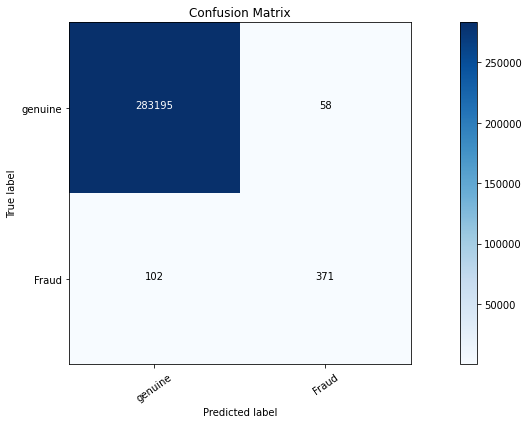

In [62]:
conf_matrix = confusion_matrix(y_expected,y_pred1.round())
plot_confusion_metrix(conf_matrix,classes=['genuine',"Fraud"])
plt.show()

# Appling  SMOTE

In [71]:
#!pip install imbalanced-learn==0.6.0

In [68]:
from imblearn.over_sampling import SMOTE

In [70]:
X_resmaple,Y_resample = SMOTE().fit_resample(X,Y)

In [72]:
X_resmaple.shape

(566506, 29)

In [ ]:
Y_resample.shape

(566506,)

In [73]:
print(Y_resample.value_counts())

0    283253
1    283253
Name: class, dtype: int64


In [75]:
lis=["Not Fraud", "Frauds"]
no_fraud = df["class"].value_counts().tolist()
values = [no_fraud[0],no_fraud[1]]
fig = px.pie(values=Y_resample.value_counts(),names=lis, width=800, height = 400 , color_discrete_sequence=["skyblue","red"],
             title="percentage between Frauds and genuine transactions")

fig.show()

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X_resmaple,Y_resample, test_size=0.3,random_state=0)

In [77]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=15,epochs=5)

Epoch 1/5
26437/26437 [==============================] - 114s 4ms/step - loss: 0.0246 - accuracy: 0.9919 - val_loss: 0.0128 - val_accuracy: 0.9967
Epoch 2/5
26437/26437 [==============================] - 91s 3ms/step - loss: 0.0103 - accuracy: 0.9973 - val_loss: 0.0103 - val_accuracy: 0.9970
Epoch 3/5
26437/26437 [==============================] - 93s 4ms/step - loss: 0.0085 - accuracy: 0.9979 - val_loss: 0.0080 - val_accuracy: 0.9979
Epoch 4/5
26437/26437 [==============================] - 113s 4ms/step - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.0083 - val_accuracy: 0.9980
Epoch 5/5
26437/26437 [==============================] - 91s 3ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.0086 - val_accuracy: 0.9980


5311/5311 [==============================] - 7s 1ms/step
Confusion Matrix, Without Normalisation
[[84543   187]
 [  147 85075]]


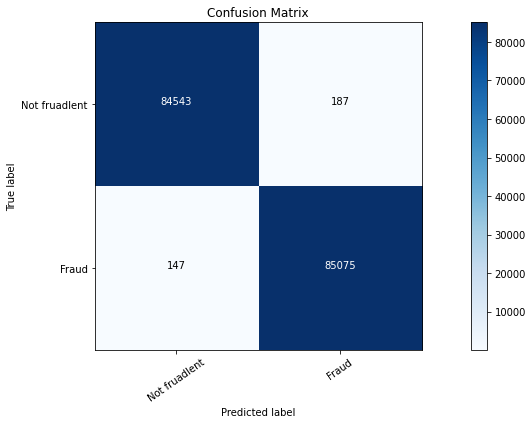

In [78]:
y_pred2 = model.predict(x_test)
y_expected = pd.DataFrame(y_test)
conf_matrix = confusion_matrix(y_expected, y_pred2.round())
plot_confusion_metrix(conf_matrix,classes=['Not fruadlent','Fraud'])
plt.show()

### Whole data sets

17704/17704 [==============================] - 23s 1ms/step
Confusion Matrix, Without Normalisation
[[282745    508]
 [   519 282734]]


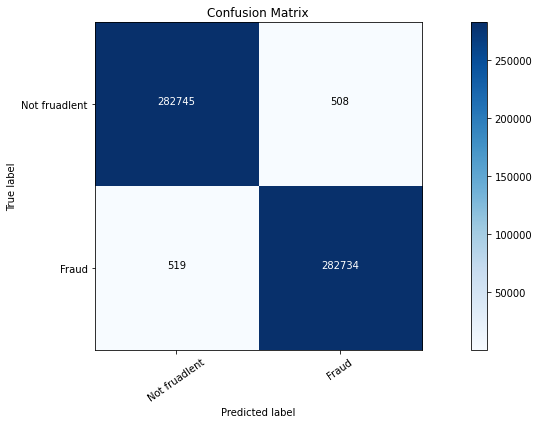

In [79]:
y_pred3 = model.predict(X_resmaple)
y_expected = pd.DataFrame(Y_resample)
conf_matrix = confusion_matrix(y_expected, y_pred3.round())
plot_confusion_metrix(conf_matrix,classes=['Not fruadlent','Fraud'])
plt.show()

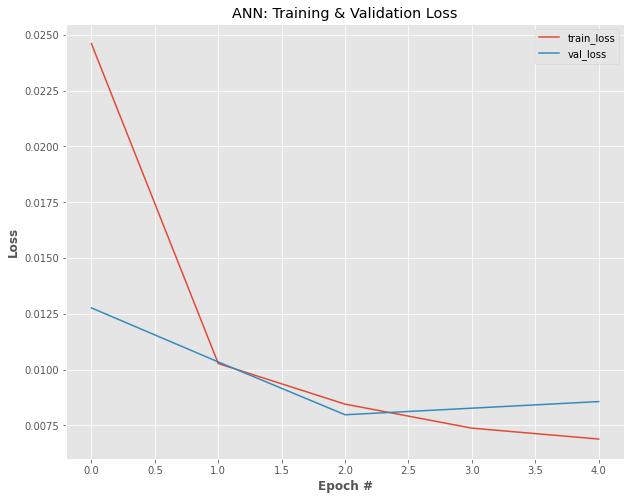

In [80]:
# Generate Plots For acc and Validation loss 
N = np.arange(0, 5)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("ANN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

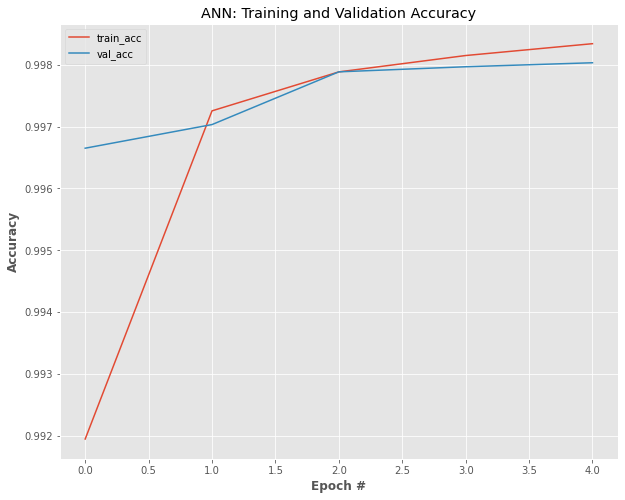

In [81]:
# plot the training and validation accuracy
N = np.arange(0, 5)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("ANN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()